## 전이 학습을 통해 딥러닝의 성능 극대화
- 딥러닝 프로그램을 잘 짜는 것도 중요하지만 딥러닝에 입력할 데이터를 모으는 것이 더 중요
    - Garbage-in-Garbage-out
- 수만 장에 달하는 기존의 이미지에서 학습한 정보를 가져와 프로젝트에 활용하는 것을 **전이 학습(transfer l0earning)**이라고 한다
- 방대한 자료를 통해 미리 학습한 가중치(weight)값을 가져와 내 프로젝트에 사용하는 방법으로 CV, NLP등 다양한 분야에서 전이 학습을 적용해 예측룰을 높인다.

### 1. 소규모 데이터셋으로 만드는 강력한 학습 모델
- 지도 학습(supervised learning)
    - : 폐암 수술 환자 생존율, 피마 인디언 당뇨병 예측, MNIST분류 등
- 비지도 학습(unsupervised learning)
    - : GAN이나 오토인코더는 정답 예측이 아닌 주어진 데이터에서 특성을 찾았기 떄문에 '비지도 학습'의 예

MRI 뇌 사진을 보고 치매환자의 뇌인지 아닌지 분류
- 치매 또는 일반인으로 클래스가 주어지므로 '지도 학습'의 예
- 이미지를 분류 : CNN을 활용

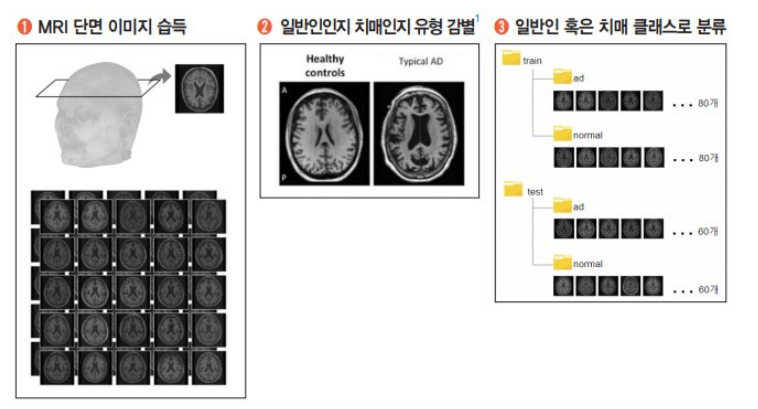

- 총 280장의 뇌 사진 (140 : 치매 환자의 특성으로 보이는 뇌사진, 140 : 일반인)
- 280 중 160은 trainset

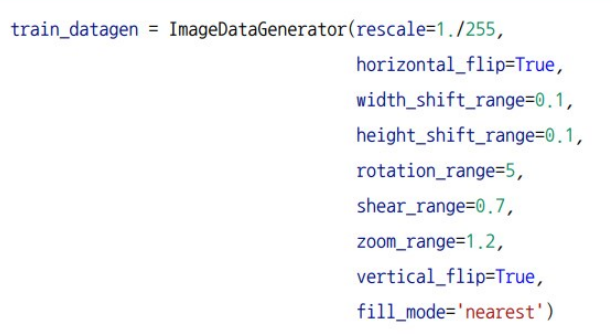

- 사용된 인자들에 대한 설명

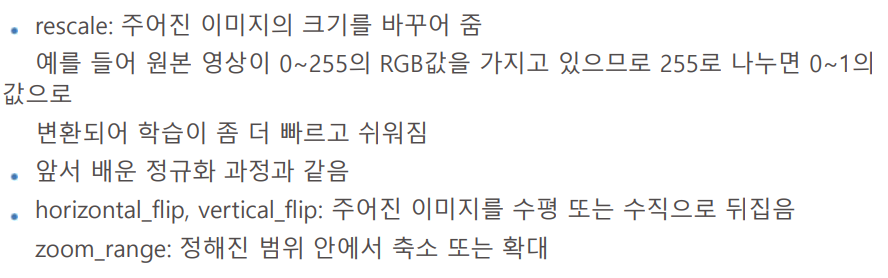
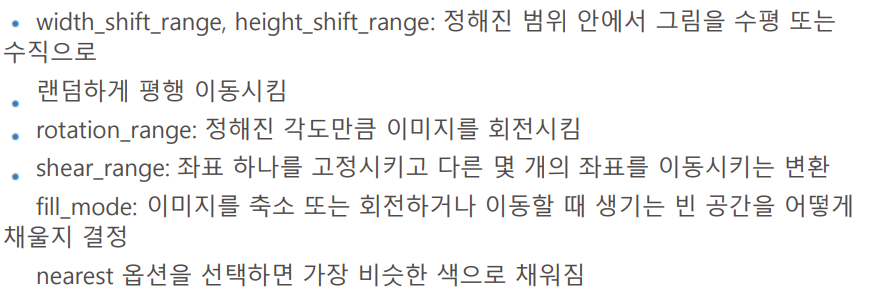

- 옵션의 결과
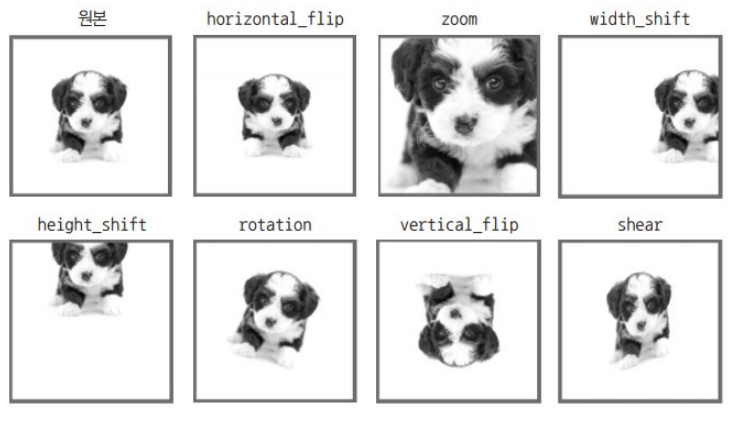

- 모든 인자를 다 적용하면 불필요한 데이터를 만들게 된다 ==> 학습시간이 늘어난다
- 데이터의 특성을 잘 파악해서 이에 맞게 활용
- *데이터 부풀리기는 학습셋에만 적용*
- 테스트셋을 실제 정보를 그대로 유지하게 하는 편이 과적합의 위험을 줄일 수 있기 때문
    - 테스트 셋은 다음과 같이 정규화만 진행

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 학습셋의 변형을 설정하는 부분입니다.
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  #zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )

In [4]:
# 테스트셋의 정규화를 설정합니다.
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# 이미지 생성 옵션을 정하고 나면 실제 데이터가 있는 곳을 알려주고 이미지를 불러오는 작업을 해야한다
# ==> flow_from_directory()함수 사용
train_generator = train_datagen.flow_from_directory(
    '../data/brain/train',  # 학습셋이 있는 폴더 위치
    target_size = (150, 150),   #이미지 크기
    batch_size = 5,
    class_mode = 'binary'   # 치매/정상 이진 부뉴이므로 바이너리 모드
    )

# 같은 과정으로 테스트셋도 생성
test_generator = train_datagen.flow_from_directory(
    '../data/brain/test',  # 학습셋이 있는 폴더 위치
    target_size = (150, 150),   #이미지 크기
    batch_size = 5,
    class_mode = 'binary'   # 치매/정상 이진 부뉴이므로 바이너리 모드
    )

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [8]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                 

In [9]:
# 모델 실행의 옵션을 설정합니다.
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다
history = model.fit(
       train_generator,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10,
       callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 14s 345ms/step - loss: 0.7019 - accuracy: 0.4812 - val_loss: 0.6872 - val_accuracy: 0.6200
Epoch 2/100
32/32 [==============================] - 6s 193ms/step - loss: 0.7035 - accuracy: 0.4437 - val_loss: 0.6863 - val_accuracy: 0.5800
Epoch 3/100
32/32 [==============================] - 6s 180ms/step - loss: 0.6834 - accuracy: 0.5875 - val_loss: 0.6868 - val_accuracy: 0.5200
Epoch 4/100
32/32 [==============================] - 6s 180ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.6835 - val_accuracy: 0.5400
Epoch 5/100
32/32 [==============================] - 6s 189ms/step - loss: 0.6715 - accuracy: 0.5875 - val_loss: 0.6817 - val_accuracy: 0.5800
Epoch 6/100
32/32 [==============================] - 5s 161ms/step - loss: 0.6732 - accuracy: 0.5813 - val_loss: 0.6553 - val_accuracy: 0.5800
Epoch 7/100
32/32 [==============================] - 5s 154ms/step - loss: 0.6607 - accuracy: 0.6375 - val_loss: 0.6451 - val_accuracy: 0.620

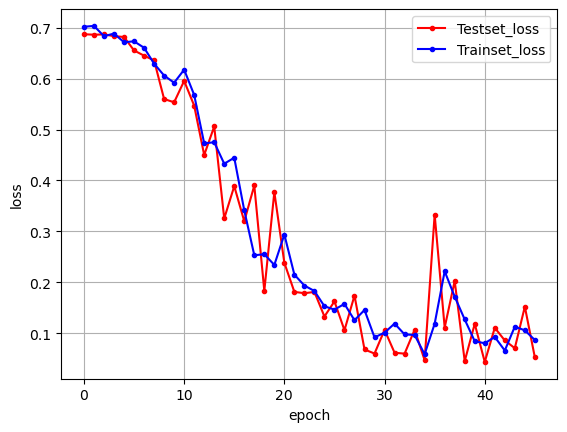

In [10]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 2. 전이학습으로 모델 성능 극대화하기
전이 학습 : 기존의 학습 결과를 가져와서 유사한 프로젝트에 사용
* VGG16모델을 사용해보자

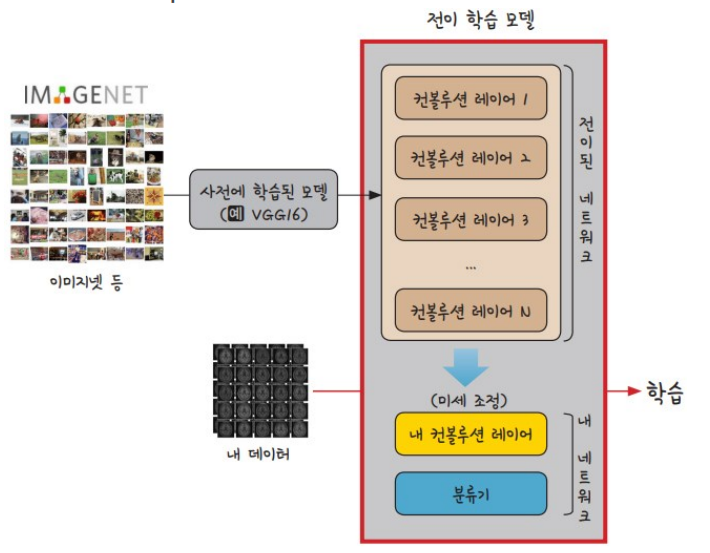

keras.io/applications 에서 다양한 모델들을 볼 수 있다

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 학습셋의 변형을 설정하는 부분입니다.
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  #zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )

train_generator = train_datagen.flow_from_directory(
       '../data/train',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

# 테스트셋의 정규화를 설정합니다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       '../data/test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


- include_top은 전체 VGG16의 마지막 층, 즉 분류 담당 층을 불러올지 말지 결정하는 옵션
    - 우리가 만든 로컬 네트워크를 연결할 것이므로 False
    - 또한 불러올 부분은 새롭게 학습되는 것이 아니므로 학습되지 않도록 transfer_model.trainable옵션 역시 False
- 학습 가능한 파라미터(Trainable params)가 없음을 확인 후 로컬 네트워크 생성

In [15]:
# VGG16 모델을 불러옵니다.
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

58889256/58889256 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

In [16]:
# 우리의 모델을 설정합니다.
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 activation_7 (Activation)   (None, 1)                

In [17]:
# 모델의 실행 옵션을 설정합니다.
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = finetune_model.fit(
       train_generator,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10,
       callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 30s 872ms/step - loss: 0.6878 - accuracy: 0.6000 - val_loss: 0.5630 - val_accuracy: 0.8000
Epoch 2/20
32/32 [==============================] - 29s 913ms/step - loss: 0.5552 - accuracy: 0.6812 - val_loss: 0.6353 - val_accuracy: 0.6000
Epoch 3/20
32/32 [==============================] - 29s 923ms/step - loss: 0.4927 - accuracy: 0.7625 - val_loss: 0.4390 - val_accuracy: 0.8200
Epoch 4/20
32/32 [==============================] - 30s 940ms/step - loss: 0.4131 - accuracy: 0.8438 - val_loss: 0.4005 - val_accuracy: 0.7800
Epoch 5/20
32/32 [==============================] - 30s 947ms/step - loss: 0.3702 - accuracy: 0.8250 - val_loss: 0.3471 - val_accuracy: 0.9400
Epoch 6/20
32/32 [==============================] - 29s 906ms/step - loss: 0.3317 - accuracy: 0.8938 - val_loss: 0.3214 - val_accuracy: 0.8600
Epoch 7/20
32/32 [==============================] - 28s 888ms/step - loss: 0.3434 - accuracy: 0.8813 - val_loss: 0.3093 - val_accuracy: 0.9200

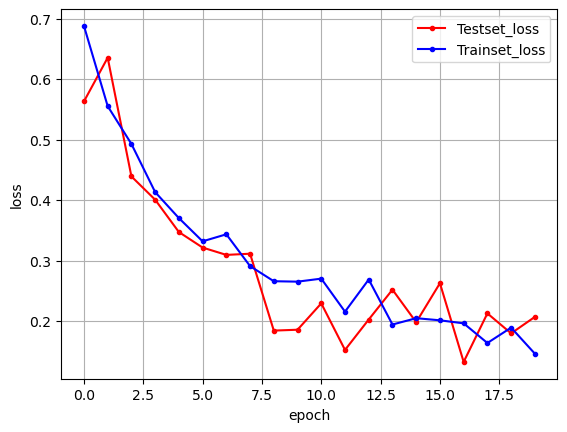

In [18]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()